In [71]:
import os
os.getcwd()

'/Users/aithadishanez/MGSC 401/Group Project/Final_proj'

In [116]:
from ISLP.models import (ModelSpec as MS, summarize, poly)

# ------ please also import os, numpy,  pandas,  matplotlib.pyplot, statsmodels.api here:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
#------Set Working Directory (use os.chdir()):
os.chdir('/Users/aithadishanez/MGSC 401/Group Project/Final_proj')
#---- load data:
df1 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2009-2010")
df2 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")

# Append them
df = pd.concat([df1, df2], ignore_index=True)

print(df.shape)
df.head()

(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [118]:
# Check for missing values
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [120]:
243007/1067371

0.22766872999172733

In [122]:
df['Customer ID'].value_counts()

Customer ID
17841.0    13097
14911.0    11613
12748.0     7307
14606.0     6709
14096.0     5128
           ...  
14580.0        1
16154.0        1
16443.0        1
15233.0        1
17948.0        1
Name: count, Length: 5942, dtype: int64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [126]:
df["InvoiceDate"] = df["InvoiceDate"].dt.date
df["InvoiceDate"]

0          2009-12-01
1          2009-12-01
2          2009-12-01
3          2009-12-01
4          2009-12-01
              ...    
1067366    2011-12-09
1067367    2011-12-09
1067368    2011-12-09
1067369    2011-12-09
1067370    2011-12-09
Name: InvoiceDate, Length: 1067371, dtype: object

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


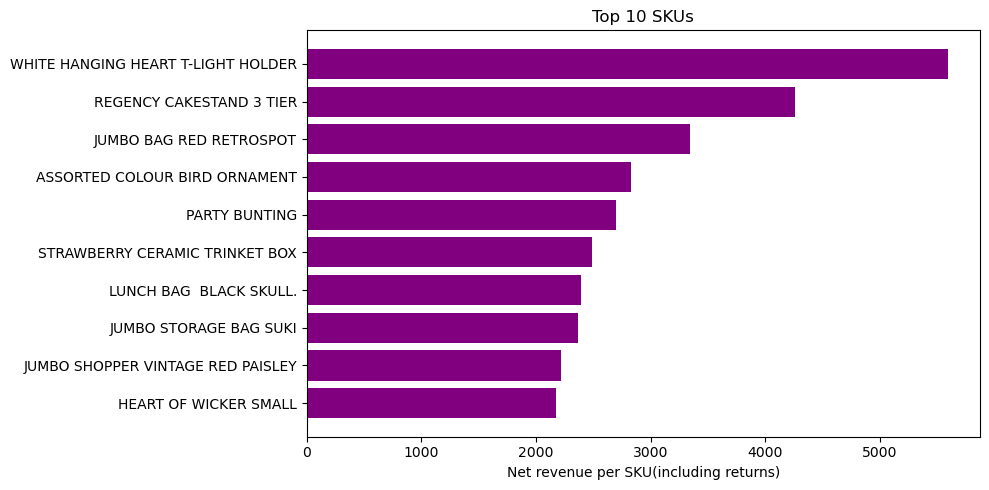

In [130]:
top_items_invoice = (
    df.groupby('Description')['Invoice'].nunique()                    # count unique invoices per product
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 5))
plt.barh(top_items_invoice.index[::-1], top_items_invoice.values[::-1], color='purple')
plt.xlabel('Net revenue per SKU(including returns)')
plt.title('Top 10 SKUs')
plt.tight_layout()
plt.show()


In [132]:
df = df[df["Quantity"] > 0]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France


Total orders per month to show seasonality patterns

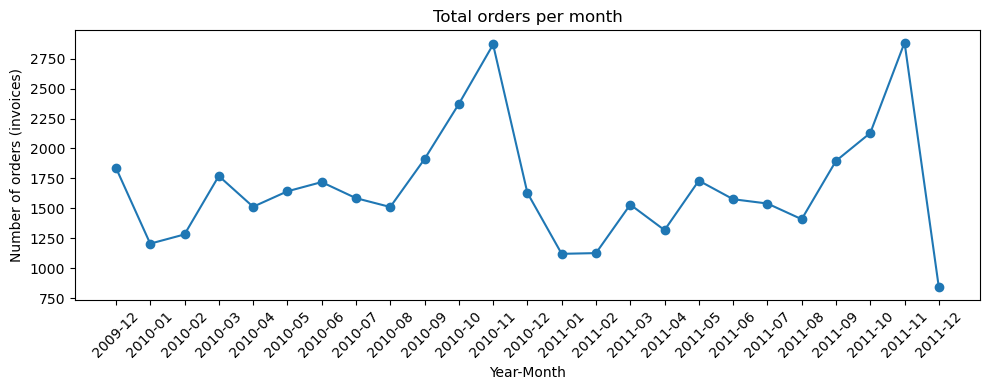

In [134]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['year_month'] = df['InvoiceDate'].dt.to_period('M')

orders_per_month = df.groupby('year_month')['Invoice'].nunique()
plt.figure(figsize=(10, 4))
plt.plot(orders_per_month.index.astype(str),
         orders_per_month.values,
         marker='o')

plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Number of orders (invoices)')
plt.title('Total orders per month')
plt.tight_layout()
plt.show()


Total number of orders per customer

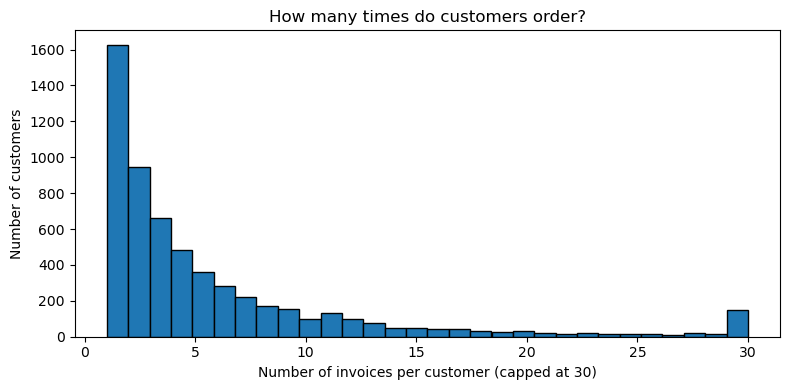

In [136]:
cust_orders = (
    df.groupby('Customer ID')['Invoice']
      .nunique()
      .reset_index(name='n_invoices')
)
cust_orders['n_invoices_capped'] = cust_orders['n_invoices'].clip(upper=30)
plt.figure(figsize=(8, 4))
plt.hist(
    cust_orders['n_invoices_capped'],
    bins=30,
    edgecolor='black',
)
plt.xlabel('Number of invoices per customer (capped at 30)')
plt.ylabel('Number of customers')
plt.title('How many times do customers order?')
plt.tight_layout()
plt.show()




How many customers order at least once?

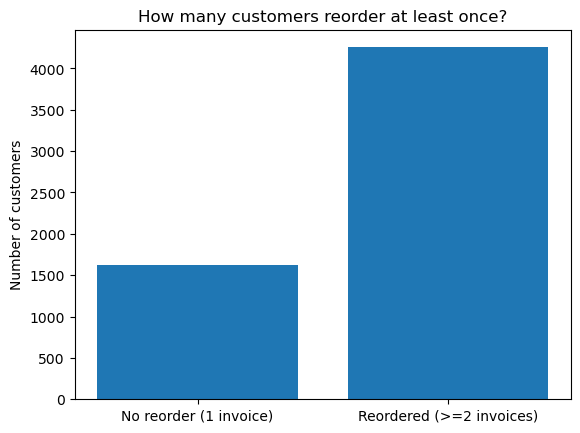

In [138]:
total_customers = cust_orders.shape[0]
n_reorder_customers = (cust_orders['n_invoices'] >= 2).sum()


plt.bar(
    ['No reorder (1 invoice)', 'Reordered (>=2 invoices)'],
    [total_customers - n_reorder_customers, n_reorder_customers]
)

plt.ylabel('Number of customers')
plt.title('How many customers reorder at least once?')
plt.show()


For our feature engineering, we can see things like is_holiday,also season and country=> since many countries we can do season

In [142]:
# drop useless columns
df = df.drop(columns = ['year_month'])

### Key feature engineering

In [144]:
df = df.dropna(subset=["Customer ID"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805620 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  float64       
 7   Country      805620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 55.3+ MB


In [145]:
# Check countires
df['Country'].value_counts()

Country
United Kingdom          725296
Germany                  16703
EIRE                     15745
France                   13813
Netherlands               5093
Spain                     3720
Belgium                   3069
Switzerland               3012
Portugal                  2446
Australia                 1815
Channel Islands           1569
Italy                     1468
Norway                    1437
Sweden                    1319
Cyprus                    1155
Finland                   1032
Austria                    922
Denmark                    798
Greece                     657
Unspecified                521
Poland                     512
Japan                      485
USA                        409
United Arab Emirates       383
Singapore                  339
Israel                     322
Malta                      282
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        123
Brazil                      94


In [146]:
# Simplify country
df['Country_simple'] = np.where(df['Country'] == 'United Kingdom', 'UK',
                         np.where(df['Country'] == 'Germany', 'Germany',
                         np.where(df['Country'] == 'EIRE', 'Ireland',
                         np.where(df['Country'] == 'France', 'France',
                                  'Other'))))


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805620 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         805620 non-null  object        
 1   StockCode       805620 non-null  object        
 2   Description     805620 non-null  object        
 3   Quantity        805620 non-null  int64         
 4   InvoiceDate     805620 non-null  datetime64[ns]
 5   Price           805620 non-null  float64       
 6   Customer ID     805620 non-null  float64       
 7   Country         805620 non-null  object        
 8   Country_simple  805620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 61.5+ MB


In [148]:
df['InvoiceDate'].value_counts()

InvoiceDate
2010-12-05    5416
2010-12-02    4000
2010-12-08    3896
2010-12-06    3890
2010-12-01    3884
              ... 
2010-12-23     336
2010-01-06     293
2011-02-06     279
2009-12-22     276
2010-12-22     216
Name: count, Length: 604, dtype: int64

In [149]:
# Convert InvoiceDate to datetime (keep as datetime, not string)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Create holiday_type column (use str for comparison inside function)
def get_holiday_type(date):
    date_str = date.strftime("%Y-%m-%d")  # convert datetime to string for comparison
    if date_str in [
        "2010-12-25", "2010-12-26",
        "2011-12-25", "2011-12-26",
        "2009-12-25", "2009-12-26"
    ]:
        return "winter_holiday"

    elif date_str in [
        "2010-02-14", "2011-02-14", "2009-02-14",
        "2010-03-14", "2011-03-27", "2009-03-18",
        "2010-06-20", "2011-06-19", "2009-06-17"
    ]:
        return "secondary_holiday"

    elif date_str in [
        "2010-01-01", "2011-01-01", "2009-01-01"
    ]:
        return "new_year"

    else:
        return "none"

df["holiday_type"] = df["InvoiceDate"].apply(get_holiday_type)
# extract month
df['month'] = df['InvoiceDate'].dt.month

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805620 entries, 0 to 1067370
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         805620 non-null  object        
 1   StockCode       805620 non-null  object        
 2   Description     805620 non-null  object        
 3   Quantity        805620 non-null  int64         
 4   InvoiceDate     805620 non-null  datetime64[ns]
 5   Price           805620 non-null  float64       
 6   Customer ID     805620 non-null  float64       
 7   Country         805620 non-null  object        
 8   Country_simple  805620 non-null  object        
 9   holiday_type    805620 non-null  object        
 10  month           805620 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(6)
memory usage: 70.7+ MB


In [151]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]).dt.floor("D")

In [152]:
df = df.sort_values(["Customer ID", "StockCode", "InvoiceDate"])


In [153]:
# Next purchase date per customer-SKU
df["next_purchase_date"] = df.groupby(["Customer ID", "StockCode"])["InvoiceDate"].shift(-1)

# Days until next purchase
df["days_to_reorder"] = (df["next_purchase_date"] - df["InvoiceDate"]).dt.days

# choose benchmark for y
median=df["days_to_reorder"].median()
mean = df["days_to_reorder"].mean()
print(median, mean)

46.0 86.53030373247073


In [154]:
# Target variable: 1 if reorder ≤median days, else 0
df["y_reorder"] = (df["days_to_reorder"] <= 42).astype(int)

# Remove rows without future purchase (cannot compute target)
df_model = df[df["next_purchase_date"].notnull()].copy()


In [155]:
df_model['days_to_reorder'].value_counts()

days_to_reorder
0.0      43389
7.0       6138
14.0      5349
21.0      5249
28.0      4248
         ...  
674.0        1
626.0        1
677.0        1
724.0        1
697.0        1
Name: count, Length: 724, dtype: int64

In [156]:
df_model.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Country_simple,holiday_type,month,next_purchase_date,days_to_reorder,y_reorder
27994,491725,TEST001,This is a test product.,10,2009-12-14,4.50,12346.0,United Kingdom,UK,none,12,2009-12-14,0.0,1
28251,491742,TEST001,This is a test product.,5,2009-12-14,4.50,12346.0,United Kingdom,UK,none,12,2009-12-14,0.0,1
28254,491744,TEST001,This is a test product.,5,2009-12-14,4.50,12346.0,United Kingdom,UK,none,12,2009-12-18,4.0,1
39398,492718,TEST001,This is a test product.,5,2009-12-18,4.50,12346.0,United Kingdom,UK,none,12,2010-01-04,17.0,1
45228,493410,TEST001,This is a test product.,5,2010-01-04,4.50,12346.0,United Kingdom,UK,none,1,2010-01-04,0.0,1
45230,493412,TEST001,This is a test product.,5,2010-01-04,4.50,12346.0,United Kingdom,UK,none,1,2010-01-14,10.0,1
56117,494450,TEST001,This is a test product.,5,2010-01-14,4.50,12346.0,United Kingdom,UK,none,1,2010-01-22,8.0,1
423928,529924,20719,WOODLAND CHARLOTTE BAG,10,2010-10-31,0.85,12347.0,Iceland,Other,none,10,2011-01-26,87.0,0
597710,542237,20719,WOODLAND CHARLOTTE BAG,10,2011-01-26,0.85,12347.0,Iceland,Other,none,1,2011-08-02,188.0,0
812090,562032,20719,WOODLAND CHARLOTTE BAG,10,2011-08-02,0.85,12347.0,Iceland,Other,none,8,2011-10-31,90.0,0


In [157]:
# Remove returns
df_model = df_model[df_model["Quantity"] > 0].copy() # we dont take into account returns
df_model.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Country_simple,holiday_type,month,next_purchase_date,days_to_reorder,y_reorder
27994,491725,TEST001,This is a test product.,10,2009-12-14,4.5,12346.0,United Kingdom,UK,none,12,2009-12-14,0.0,1
28251,491742,TEST001,This is a test product.,5,2009-12-14,4.5,12346.0,United Kingdom,UK,none,12,2009-12-14,0.0,1
28254,491744,TEST001,This is a test product.,5,2009-12-14,4.5,12346.0,United Kingdom,UK,none,12,2009-12-18,4.0,1
39398,492718,TEST001,This is a test product.,5,2009-12-18,4.5,12346.0,United Kingdom,UK,none,12,2010-01-04,17.0,1
45228,493410,TEST001,This is a test product.,5,2010-01-04,4.5,12346.0,United Kingdom,UK,none,1,2010-01-04,0.0,1


In [158]:

# Shift to get the previous purchase date
df_model["prev_purchase_date"] = df_model.groupby(["Customer ID", "StockCode"])["InvoiceDate"].shift(1)

# Compute days since last purchase
df_model["days_since_last"] = (
    df_model["InvoiceDate"] - df_model["prev_purchase_date"]
).dt.days

# Replace NaN days with -1 (first purchase)
df_model["days_since_last"] = df_model["days_since_last"].fillna(-1)


In [159]:
df_model.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Country_simple,holiday_type,month,next_purchase_date,days_to_reorder,y_reorder,prev_purchase_date,days_since_last
27994,491725,TEST001,This is a test product.,10,2009-12-14,4.5,12346.0,United Kingdom,UK,none,12,2009-12-14,0.0,1,NaT,-1.0
28251,491742,TEST001,This is a test product.,5,2009-12-14,4.5,12346.0,United Kingdom,UK,none,12,2009-12-14,0.0,1,2009-12-14,0.0
28254,491744,TEST001,This is a test product.,5,2009-12-14,4.5,12346.0,United Kingdom,UK,none,12,2009-12-18,4.0,1,2009-12-14,0.0
39398,492718,TEST001,This is a test product.,5,2009-12-18,4.5,12346.0,United Kingdom,UK,none,12,2010-01-04,17.0,1,2009-12-14,4.0
45228,493410,TEST001,This is a test product.,5,2010-01-04,4.5,12346.0,United Kingdom,UK,none,1,2010-01-04,0.0,1,2009-12-18,17.0


In [160]:
df_model["y_reorder"].value_counts()

y_reorder
0    168182
1    155491
Name: count, dtype: int64

In [161]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323673 entries, 27994 to 724201
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Invoice             323673 non-null  object        
 1   StockCode           323673 non-null  object        
 2   Description         323673 non-null  object        
 3   Quantity            323673 non-null  int64         
 4   InvoiceDate         323673 non-null  datetime64[ns]
 5   Price               323673 non-null  float64       
 6   Customer ID         323673 non-null  float64       
 7   Country             323673 non-null  object        
 8   Country_simple      323673 non-null  object        
 9   holiday_type        323673 non-null  object        
 10  month               323673 non-null  int32         
 11  next_purchase_date  323673 non-null  datetime64[ns]
 12  days_to_reorder     323673 non-null  float64       
 13  y_reorder           323673 non

In [162]:
# drop useless columns
df_model = df_model.drop(columns = ['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Customer ID', 'Country', 'next_purchase_date', 'prev_purchase_date', 'days_to_reorder'])
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323673 entries, 27994 to 724201
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Quantity         323673 non-null  int64  
 1   Price            323673 non-null  float64
 2   Country_simple   323673 non-null  object 
 3   holiday_type     323673 non-null  object 
 4   month            323673 non-null  int32  
 5   y_reorder        323673 non-null  int64  
 6   days_since_last  323673 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 18.5+ MB


In [163]:
df_model1 = df_model.copy()
df_model1 = df_model1.drop(columns = ['days_since_last', 'month'])

In [164]:
df_model1.describe()

,Quantity,Price,y_reorder
count,323673.000000,323673.000000,323673.000000
mean,14.808229,3.280209,0.480395
std,64.195136,33.079605,0.499616
min,1.000000,0.000000,0.000000
25%,2.000000,1.250000,0.000000
50%,5.000000,1.950000,0.000000
75%,12.000000,3.750000,1.000000
max,10000.000000,10468.800000,1.000000


In [165]:
# Standardize data
from sklearn.preprocessing import StandardScaler

numeric_cols = ["Quantity", "Price"]

scaler = StandardScaler()
df_model1[numeric_cols] = scaler.fit_transform(df_model1[numeric_cols])


In [166]:
# Get dummies
df_model1 = pd.get_dummies(df_model1, columns=["Country_simple"], drop_first=True)

df_model1['holiday_type'] = df_model1['holiday_type'].astype('category')
# Replace 'none' with NaN (so it will be ignored by get_dummies)
df_model1['holiday_type'] = df_model1['holiday_type'].replace('none', pd.NA)
# Create dummies
df_model1 = pd.get_dummies(df_model1, columns=['holiday_type'], dummy_na=False)


/var/folders/nq/6qrjl_c93zv7gl0_6fvc60mm0000gn/T/ipykernel_21315/2287321872.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_model1['holiday_type'] = df_model1['holiday_type'].replace('none', pd.NA)


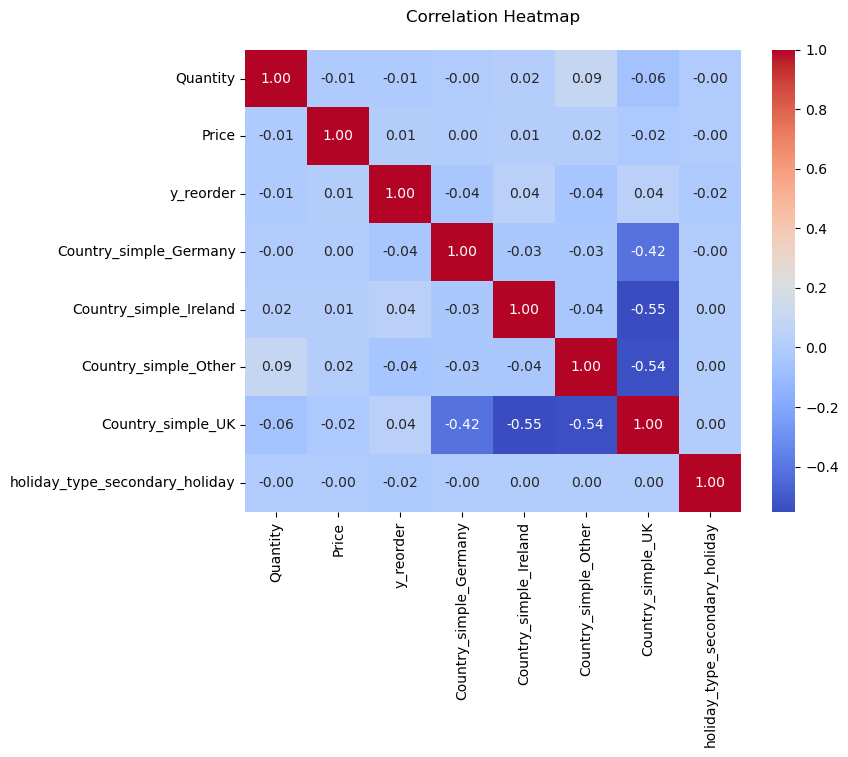

In [167]:
import seaborn as sns
# Correlation heatmap
correlation_matrix = df_model1.corr() # for numeric columns only

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', pad=20)
plt.show()

### Logistic Regression Model (Generic Coefficients)

Logit form:

$\log \frac{p}{1-p} = B_0 + B_1 \cdot \text{Quantity} + B_2 \cdot \text{Price} + B_3 \cdot \text{Country\_Germany} + B_4 \cdot \text{Country\_Ireland} + ... + B_7 \cdot \text{SecondaryHoliday}$


In [169]:
# Fix dummies dtypes
# Convert all boolean columns to int
bool_cols = df_model1.select_dtypes(include='bool').columns
df_model1[bool_cols] = df_model1[bool_cols].astype(int)


In [170]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Features and target
X = df_model1.drop('y_reorder', axis=1)
y = df_model1['y_reorder']

# Fit logistic regression on training data
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()

# Summary
print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              y_reorder   No. Observations:               323673
Model:                            GLM   Df Residuals:                   323666
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.2323e+05
Date:                Sun, 07 Dec 2025   Deviance:                   4.4646e+05
Time:                        10:33:17   Pearson chi2:                 6.27e+07
No. Iterations:                     7   Pseudo R-squ. (CS):           0.005397
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Quantity    

In [171]:
import statsmodels.api as sm

# Fit GLM as before
X = sm.add_constant(X)  # or your full X if not split
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()

# Use summary2 to get a DataFrame
results_summary = results.summary2().tables[1]  # Coefficients table

# Filter for significant coefficients (p <= 0.05)
results_sig = results_summary[results_summary['P>|z|'] <= 0.05]
results_sig


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-0.684769,0.027751,-24.675168,1.976295e-134,-0.739161,-0.630377
Quantity,-0.012391,0.003884,-3.190419,1.420667e-03,-0.020002,-0.004779
Price,0.069050,0.014149,4.880100,1.060319e-06,0.041318,0.096781
Country_simple_Ireland,1.026224,0.033649,30.497813,2.785782e-204,0.960273,1.092175
Country_simple_Other,0.115687,0.034291,3.373724,7.415859e-04,0.048479,0.182896
Country_simple_UK,0.636085,0.028003,22.714890,3.192657e-114,0.581200,0.690969
holiday_type_secondary_holiday,-0.446483,0.044630,-10.004044,1.462980e-23,-0.533957,-0.359009


### Results Analysis

In [173]:
# Convert coefficients to exp
results_sig['odds_ratio'] = np.exp(results_sig['Coef.'])

results_sig


/var/folders/nq/6qrjl_c93zv7gl0_6fvc60mm0000gn/T/ipykernel_21315/1382551849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sig['odds_ratio'] = np.exp(results_sig['Coef.'])


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],odds_ratio
const,-0.684769,0.027751,-24.675168,1.976295e-134,-0.739161,-0.630377,0.504207
Quantity,-0.012391,0.003884,-3.190419,1.420667e-03,-0.020002,-0.004779,0.987686
Price,0.069050,0.014149,4.880100,1.060319e-06,0.041318,0.096781,1.071489
Country_simple_Ireland,1.026224,0.033649,30.497813,2.785782e-204,0.960273,1.092175,2.790509
Country_simple_Other,0.115687,0.034291,3.373724,7.415859e-04,0.048479,0.182896,1.122645
Country_simple_UK,0.636085,0.028003,22.714890,3.192657e-114,0.581200,0.690969,1.889070
holiday_type_secondary_holiday,-0.446483,0.044630,-10.004044,1.462980e-23,-0.533957,-0.359009,0.639875


In [174]:
#========= get probability for customer ID
probs = results.predict(X)
probs


27994     0.488699
28251     0.488941
28254     0.488941
39398     0.488941
45228     0.488941
            ...   
724202    0.484698
724203    0.487117
199834    0.487117
478768    0.485276
724201    0.485959
Length: 323673, dtype: float64

In [175]:
#=========set a threshold to make prediction
threshold=0.5
labels = np.where(probs > threshold, 1, 0)
labels

array([0, 0, 0, ..., 0, 0, 0])

In [176]:
from ISLP import confusion_table
#==========generate confusion matrix
cm = confusion_table(labels, y)
cm

Truth,0,1
Predicted,,
0,163383,148688
1,4799,6803


In [177]:
#=======create data frame
compare=pd.DataFrame({'Actual Dec': df_model1['y_reorder'], 'Prob': probs, 'Prediced Dec': labels})
compare

,Actual Dec,Prob,Prediced Dec
27994,1,0.488699,0
28251,1,0.488941,0
28254,1,0.488941,0
39398,1,0.488941,0
45228,1,0.488941,0
...,...,...,...
724202,1,0.484698,0
724203,0,0.487117,0
199834,0,0.487117,0
478768,0,0.485276,0


In [178]:
#=======accuracy, specificity, sensitivity

tn, fp, fn, tp = cm.to_numpy().ravel()   # unpack confusion matrix

accuracy    = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)   # true positive rate, recall
specificity = tn / (tn + fp)   # true negative rate

print(f"Accuracy:    {accuracy:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")

Accuracy:    0.526
Sensitivity: 0.586
Specificity: 0.524


AUC: 0.552


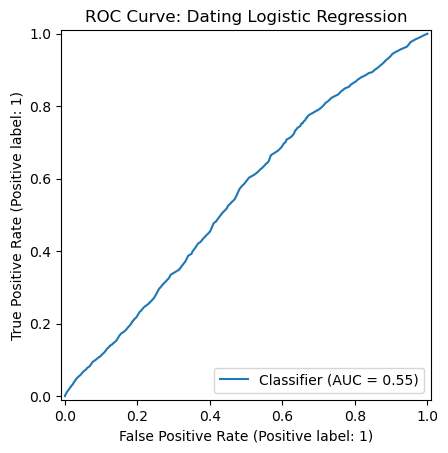

In [179]:
#========= ROC curve

from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

#----- get prob
probs = results.predict(X)  # fitted probabilities

#----- compute AUC
auc = roc_auc_score(y, probs)
print(f"AUC: {auc:.3f}")

#-----draw the graph
RocCurveDisplay.from_predictions(y, probs)


#-----add title
plt.title("ROC Curve: Dating Logistic Regression")
plt.show()

### Logistics regression model 2

In [181]:
df_model2 = df_model.copy()
# Create dummy: 1 if days_since_last <= 42, else 0
df_model2['has_prev_purchase'] = (df_model2['days_since_last'] <= 42).astype(int)
df_model2 = df_model2.drop(columns = ['days_since_last'])

In [182]:
df_model2.describe()

,Quantity,Price,month,y_reorder,has_prev_purchase
count,323673.000000,323673.000000,323673.000000,323673.000000,323673.000000
mean,14.808229,3.280209,7.212427,0.480395,0.734476
std,64.195136,33.079605,3.514450,0.499616,0.441613
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,1.250000,4.000000,0.000000,0.000000
50%,5.000000,1.950000,7.000000,0.000000,1.000000
75%,12.000000,3.750000,10.000000,1.000000,1.000000
max,10000.000000,10468.800000,12.000000,1.000000,1.000000


In [183]:
# Standardize data
from sklearn.preprocessing import StandardScaler

numeric_cols = ["Quantity", "Price"]

scaler = StandardScaler()
df_model2[numeric_cols] = scaler.fit_transform(df_model2[numeric_cols])


In [184]:
# Get dummies
df_model2 = pd.get_dummies(df_model2, columns=["Country_simple", 'month'], drop_first=True)
# First, replace 'none' with NaN so get_dummies can drop it
df_model2['holiday_type'] = df_model2['holiday_type'].replace('none', pd.NA)

# Create dummies for holiday_type, drop NaN (i.e., 'none')
df_model2 = pd.get_dummies(df_model2, columns=['holiday_type'], dummy_na=False)



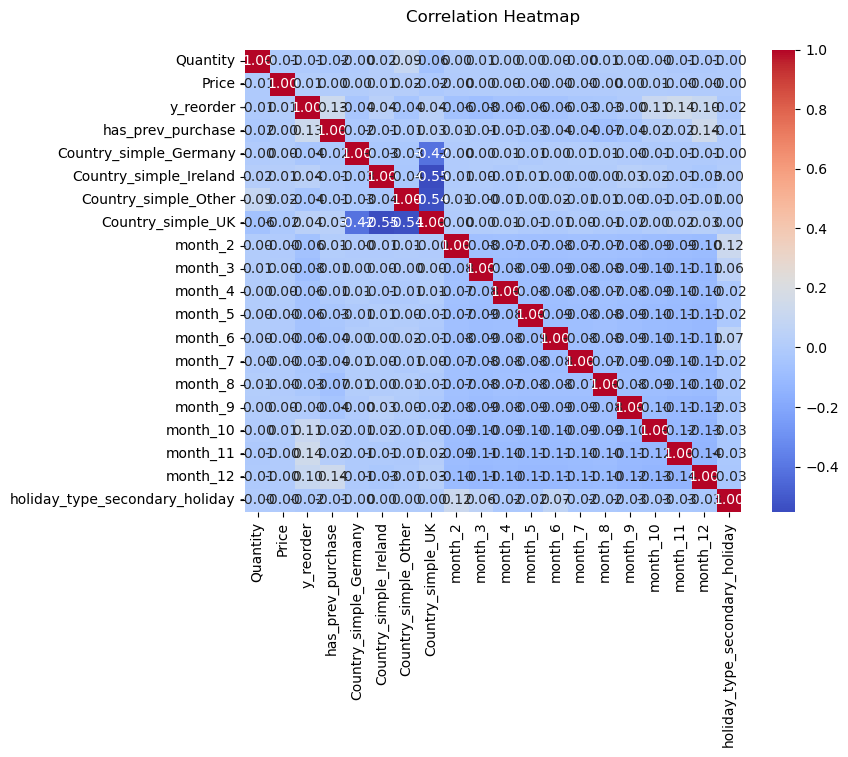

In [185]:
import seaborn as sns
# Correlation heatmap
correlation_matrix = df_model2.corr() # for numeric columns only

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', pad=20)
plt.show()

In [186]:
# Fix dummies dtypes
# Convert all boolean columns to int
bool_cols = df_model2.select_dtypes(include='bool').columns
df_model2[bool_cols] = df_model2[bool_cols].astype(int)


### Logistic Regression Model 2

**Logit form:**

$$
\log \frac{p}{1-p} = B_0
+ B_1 \cdot \text{Quantity}
+ B_2 \cdot \text{Price}
+ B_3 \cdot \text{has\_prev\_purchase}
+ ...
+ B_{19} \cdot \text{holiday\_type\_secondary\_holiday}
$$

In [188]:
import statsmodels.api as sm

# X = all features (numeric + encoded categorical)
X2 = df_model2.drop('y_reorder', axis=1)
y2 = df_model2['y_reorder']

# Add intercept column
X2 = sm.add_constant(X2)

# Logistic regression (GLM with Binomial family)
glm = sm.GLM(y2, X2, family=sm.families.Binomial())
results = glm.fit()
results_summary=summarize(results)

results_summary


,coef,std err,z,P>|z|
const,-1.5173,0.033,-46.393,0.000
Quantity,0.0007,0.004,0.200,0.841
Price,0.0643,0.014,4.601,0.000
has_prev_purchase,0.5440,0.009,63.769,0.000
Country_simple_Germany,0.0053,0.039,0.134,0.893
Country_simple_Ireland,1.0125,0.035,29.005,0.000
Country_simple_Other,0.0977,0.036,2.751,0.006
Country_simple_UK,0.5786,0.029,19.920,0.000
month_2,-0.0407,0.021,-1.914,0.056
month_3,-0.1168,0.020,-5.861,0.000


In [189]:
results_sig= results_summary[results_summary['P>|z|']<=0.05]
results_sig

,coef,std err,z,P>|z|
const,-1.5173,0.033,-46.393,0.000
Price,0.0643,0.014,4.601,0.000
has_prev_purchase,0.5440,0.009,63.769,0.000
Country_simple_Ireland,1.0125,0.035,29.005,0.000
Country_simple_Other,0.0977,0.036,2.751,0.006
Country_simple_UK,0.5786,0.029,19.920,0.000
month_3,-0.1168,0.020,-5.861,0.000
month_4,0.0514,0.021,2.501,0.012
month_5,0.0833,0.020,4.208,0.000
month_6,0.1200,0.020,6.072,0.000


In [190]:
# Convert coefficients to exp
results_sig['odds_ratio'] = np.exp(results_sig['coef'])

results_sig


/var/folders/nq/6qrjl_c93zv7gl0_6fvc60mm0000gn/T/ipykernel_21315/1172409203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_sig['odds_ratio'] = np.exp(results_sig['coef'])


,coef,std err,z,P>|z|,odds_ratio
const,-1.5173,0.033,-46.393,0.000,0.219303
Price,0.0643,0.014,4.601,0.000,1.066412
has_prev_purchase,0.5440,0.009,63.769,0.000,1.722885
Country_simple_Ireland,1.0125,0.035,29.005,0.000,2.752474
Country_simple_Other,0.0977,0.036,2.751,0.006,1.102632
Country_simple_UK,0.5786,0.029,19.920,0.000,1.783540
month_3,-0.1168,0.020,-5.861,0.000,0.889763
month_4,0.0514,0.021,2.501,0.012,1.052744
month_5,0.0833,0.020,4.208,0.000,1.086868
month_6,0.1200,0.020,6.072,0.000,1.127497


In [191]:
#========= get probability for customer ID
probs = results.predict(X2)
probs

27994     0.636814
28251     0.636801
28254     0.636801
39398     0.636801
45228     0.403153
            ...   
724202    0.297679
724203    0.422017
199834    0.422017
478768    0.584119
724201    0.297702
Length: 323673, dtype: float64

In [192]:
#=========set a threshold to make prediction
threshold=0.5
labels = np.where(probs > threshold, 1, 0)
labels

array([1, 1, 1, ..., 0, 1, 0])

In [193]:
from ISLP import confusion_table
#==========generate confusion matrix
cm = confusion_table(labels, y)
cm

Truth,0,1
Predicted,,
0,120428,73391
1,47754,82100


In [194]:
#=======create data frame
compare=pd.DataFrame({'Actual Dec': df_model2['y_reorder'], 'Prob': probs, 'Prediced Dec': labels})
compare

,Actual Dec,Prob,Prediced Dec
27994,1,0.636814,1
28251,1,0.636801,1
28254,1,0.636801,1
39398,1,0.636801,1
45228,1,0.403153,0
...,...,...,...
724202,1,0.297679,0
724203,0,0.422017,0
199834,0,0.422017,0
478768,0,0.584119,1


In [195]:
#=======accuracy, specificity, sensitivity

tn, fp, fn, tp = cm.to_numpy().ravel()   # unpack confusion matrix

accuracy    = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)   # true positive rate, recall
specificity = tn / (tn + fp)   # true negative rate

print(f"Accuracy:    {accuracy:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")

Accuracy:    0.626
Sensitivity: 0.632
Specificity: 0.621


AUC: 0.663


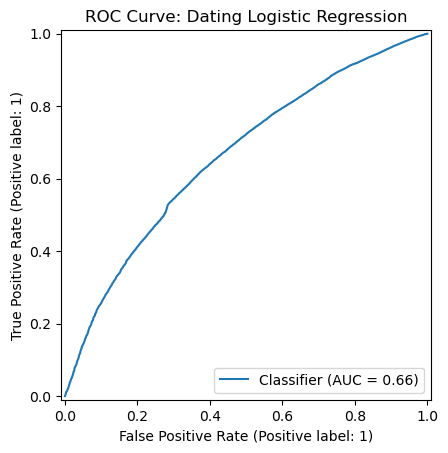

In [196]:
#========= ROC curve

from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

#----- get prob
probs = results.predict(X2)  # fitted probabilities

#----- compute AUC
auc = roc_auc_score(y2, probs)
print(f"AUC: {auc:.3f}")

#-----draw the graph
RocCurveDisplay.from_predictions(y2, probs)


#-----add title
plt.title("ROC Curve: Dating Logistic Regression")
plt.show()